# Campos magnéticos gerados por uma corrente

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 10 de Junho de 2022

O objetivo deste `Notebook` é determinarmos uma solução numérica para os campos magnéticos gerados por uma certa corrente. Tentaremos obter graficamente o campo magnético gerado por um fio retilínio e por um loop circular de corrente.

### Importando as bibliotecas necessárias

Neste `Notebook`, utilizaremos as bibliotecas `matplotlib`, `numpy` e `scipy`. Particularmente, utilizaremos o Toolkit `mplot3d` para a biblioteca `matplotlib` para plotarmos os gráficos em 3D.

In [1]:
import matplotlib.pyplot as plt
import scipy.constants as sconst
import scipy.integrate as sint
import numpy as np

## 1. A lei de Biot-Savart

Para a magnetostática, a lei de Biot-Savart tem um papel semelhante a lei de Couloumb na eletrostática. Ou seja, é um ponto de partida. Sendo assim, é necessário que realizemos uma certa introdução de como esta lei funciona, pois é de onde partiremos para resolver numericamente nosso problema.

Para uma certa distribuição linear de corrente (numa curva fechada, ou em um fio, por exemplo), a lei tem a seguinte forma:

$$
d\vec{B} = \frac{\mu_0 I}{4\pi} \frac{d\vec{l} \times \hat{r}}{|\vec{r}|^2},
$$

onde $d\vec{B}$ é o campo magnético infinitesimal gerado, $I$ é a corrente que passa pelo segmento, $\vec{r}$ é o vetor posição e $d\vec{l}$ é o vetor que aponta na direção do caminho e tem magnitude de um certo comprimento infinitesimal $dl$.

Basicamente, ao olharmos pra "cara" da fórmula, podemos perceber que a orientação do campo magnético é totalmente determinada pelo produto vetorial entre $d\vec{l}$ e $\vec{r}$. Ou seja, podemos determinar o sentido do campo magnético em certo segmento utilizando da regra da mão direita.

<img src="../Imagens/Campos%20magnéticos%20gerados%20por%20uma%20corrente/biotsavart.png"  width="400">

Olhando para a equação, vemos que ela tem sua forma em termos das componentes infinitesimais. Uma escolha natural é integrarmos a equação ao longo de uma certa curva C. Podemos, supor, pelo menos em primeiro caso, que $I$ é constante e o retiraremos da integral.

$$
\vec{B} = \frac{\mu_0 I}{4\pi} \int_{C}\frac{d\vec{l} \times \hat{r}}{|\vec{r}|^2},
$$

Sabemos também que o vetor $d\vec{l}$ pode ser dado por $d\vec{l} = dl\ \hat{\eta}$, onde $\hat{\eta}$ é o vetor unitário que aponta na direção do caminho.

## 2. O campo magnético em um fio retilínio

Introduzida a lei de Biot-Savart, começaremos com o caso mais simples de geometria possível, um fio retilínio. Uma outra forma de escrever a lei de Biot-Savart é a seguinte:

$$
\vec{B} = \frac{\mu_0 I}{4\pi} \int_{C}\frac{d\vec{l} \times \vec{r}}{|\vec{r}|^3}
$$

Desta forma, devemos determinar o $d\vec{l}$ e o vetor $\vec{r}$ de nosso problema. Para isso, imagine o seguinte esquema para o fio retilínio:

![Fio retilínio com origem na extremidade esquerda](../Imagens/Campos%20magn%C3%A9ticos%20gerados%20por%20uma%20corrente/diagramafioretilinio.png)

É evidente, ao olhar pela imagem, que podemos descrever nosso $d\vec{l}$ como $d\vec{l} = dx\hat{i}$. Perceba, também, que nosso $\vec{r}$ pode ser escrito como $\vec{r} = \vec{r_p} - \vec{r_l}$, onde $\vec{r_l}$ é o vetor posição que vai da origem até um ponto do fio e $\vec{r_p} = x_p\hat{i} + y_p\hat{j} + z_p\hat{k}$ é o vetor posição do ponto onde queremos determinar o campo.

Podemos escrever $\vec{r_l}$ como $\vec{r_l} = x \hat{i}$. Portanto, o vetor $\vec{r}$ será dado por:

$$
\vec{r} = (x_p - x)\hat{i} + y_p\hat{j} + z_p\hat{k},
$$

o que nos dá que:

$$
|\vec{r}|^3 = [(x_p - x)^2 + y_p^2 + z_p^2]^{3/2}.
$$

Agora, calculamos o produto vetorial entre $d\vec{l}$ e $\vec{r}$:

$$
d\vec{l} \times \vec{r} = -z_p\ dx \hat{j} + y_p\ dx \hat{k}.
$$

Assim, nossa integral se torna:

$$
\vec{B} = \frac{\mu_0 I}{4\pi} \int_{0}^{L}\frac{-z_p\ dx \hat{j} + y_p\ dx \hat{k}}{[(x_p - x)^2 + y_p^2 + z_p^2]^{3/2}},
$$

onde podemos dividir $\vec{B}$ em suas 3 componentes em $R^3$:

$$
B_x = 0,
$$

$$ 
B_y = -\frac{\mu_0 I}{4\pi} z_p \int_{0}^{L}\frac{dx}{[(x_p - x)^2 + y_p^2 + z_p^2]^{3/2}},
$$

$$ 
B_z = \frac{\mu_0 I}{4\pi} y_p \int_{0}^{L}\frac{dx}{[(x_p - x)^2 + y_p^2 + z_p^2]^{3/2}}.
$$



Note que a integral que temos que resolver para $B_y$ e $B_z$ é a mesma e, claro, podemos resolver esta integral numericamente. Antes de fazer isso, definiremos os parâmetros iniciais de nosso problema. Para isso, considere que:

$$
L = 1\ m, \\
I = 1\ A. \\
$$

Agora, definiremos em código estes parâmetros iniciais e a função a ser integrada.

In [2]:
I = 1
L = 1

def integrand(x, xp, yp, zp):
    return 1/(((xp - x)**2 + yp**2 + zp**2)**(3/2))

Definiremos também o grid de pontos no qual calcularemos os valores para o campo.

In [3]:
xp_list = np.linspace(-1, 2, 4)
yp_list = np.linspace(-1, 2, 15)
zp_list = np.linspace(-1, 2, 15)

Para cada ponto, queremos associar um vetor para o campo e o plotar no gráfico utilizando dos plots em 3D. Para fazer isso, calcularemos o resultado da integral, calcularemos os valores do campo, o associaremos a um vetor e o plotaremos. Tudo ao mesmo tempo. Além disso, é também conveniente plotar uma linha que represente nosso fio retilínio.

Calcularemos o resultado da integral utilizando a função `quad` do `scipy.integrate`. Esta função recebe como parâmetro uma função, o intervalo de integração, e os parâmetros da função a ser integrada. 

Plotaremos os vetores utilizando a função `quiver` do `matplotlib`.

Isto pode ser feito da seguinte forma:

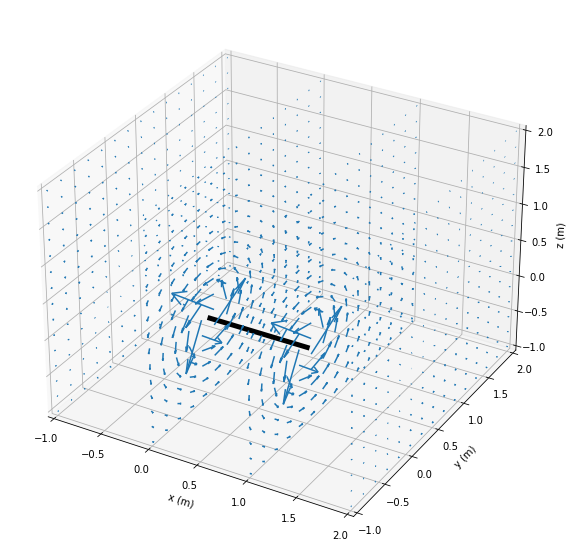

In [4]:
fig = plt.figure(figsize=(10, 10))
# No parâmetro figsize definimos o tamanho da figura
ax = fig.add_subplot(111, projection='3d')
# (É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões)

for xp in xp_list:
    for yp in yp_list:
        for zp in zp_list:
            # Resultado da integração
            result = sint.quad(integrand, 0, L, args=(xp, yp, zp))

            # Valores de cada componente do campo
            bx = 0
            by = -sconst.mu_0*I/(4*np.pi)*zp*result[0]
            bz = sconst.mu_0*I/(4*np.pi)*yp*result[0]

            # Definindo um vetor no gráfico
            ax.quiver(xp, yp, zp, bx, by, bz, length=1e6)

# Definindo os parâmetros do gráfico e plotando
ax.plot3D([0,1],[0,0],[0,0], color="black", linewidth = 5) # Plotando o fio retilínio
ax.set_xlim([-1,2])
ax.set_ylim([-1,2])
ax.set_zlim([-1,2])
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.show()

Faremos agora o mesmo plot, porém com os vetores normalizados, para que a visualização da direção dos vetores fique mais fácil.

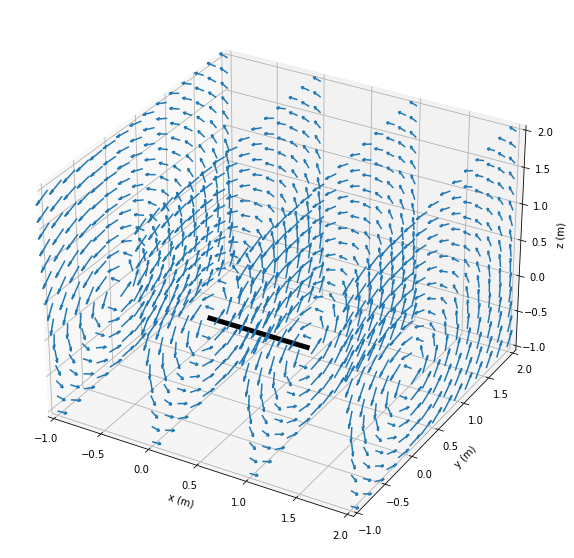

In [5]:
fig = plt.figure(figsize=(10, 10))
# No parâmetro figsize definimos o tamanho da figura
ax = fig.add_subplot(111, projection='3d')
# (É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões)

for xp in xp_list:
    for yp in yp_list:
        for zp in zp_list:
            # Resultado da integração
            result = sint.quad(integrand, 0, L, args=(xp, yp, zp))

            # Valores de cada componente do campo
            bx = 0
            by = -sconst.mu_0*I/(4*np.pi)*zp*result[0]
            bz = sconst.mu_0*I/(4*np.pi)*yp*result[0]

            # Normalizando as componentes do campo
            modb = np.sqrt(bx**2 + by**2 + bz**2)
            bxnorm = bx/modb
            bynorm = by/modb
            bznorm = bz/modb

            # Definindo um vetor no gráfico (normalizado)
            ax.quiver(xp, yp, zp, bxnorm, bynorm, bznorm, length=0.2)

# Definindo os parâmetros do gráfico e plotando
ax.plot3D([0,1],[0,0],[0,0], color="black", linewidth = 5) # Plotando o fio retilínio
ax.set_xlim([-1,2])
ax.set_ylim([-1,2])
ax.set_zlim([-1,2])
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.show()

É interessante vermos que o comportamento é como esperávamos dos resultados analíticos já conhecidos. Ou seja, o campo magnético gerado circula o fio e não tem componentes em $x$. Note também que a intensidade do campo magnético é bem maior na região onde está o fio ($0 \leq x_p \leq 1$).

Se fixarmos $x_p$ e $y_p$ em certo valor (como por exemplo $x_p = 0.5$ e $y_p=0$, no centro do fio), podemos plotar um gráfico do módulo de $\vec{B}$ em função de $z_p$. 

Façamos no mesmo gráfico uma comparação com a expressão conhecida para o fio infinito:

$$
|\vec{B}| = \frac{\mu_0 I}{2\pi R}
$$

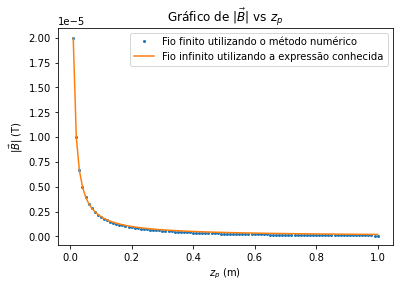

In [6]:
zp_list2 = np.linspace(0.01, 1, 100)
modb_list = []
modbinf_list = []

for zp in zp_list2:
    # Resultado da integração
    xp = 0.5
    yp = 0
    result = sint.quad(integrand, 0, L, args=(xp, yp, zp))

    # Valores de cada componente do campo
    bx = 0
    by = -sconst.mu_0*I/(4*np.pi)*zp*result[0]
    bz = sconst.mu_0*I/(4*np.pi)*yp*result[0]

    # Cálculo do módulo do campo numérico
    modb = np.sqrt(bx**2 + by**2 + bz**2)
    modb_list.append(modb)

    # Cálculo do campo no fio infinito
    modbinf = sconst.mu_0*I/(2*np.pi*zp)
    modbinf_list.append(modbinf)
    
# Plotando o gráfico
plt.plot(zp_list2, modb_list, "o", label="Fio finito utilizando o método numérico", markersize = 2)
plt.plot(zp_list2, modbinf_list, label="Fio infinito utilizando a expressão conhecida")
plt.legend()
plt.xlabel(r'$z_p$ (m)')
plt.ylabel(r'$|\vec{B}|$ (T)')
plt.title(r'Gráfico de $|\vec{B}|$ vs $z_p$')
plt.show()

## 3. O campo magnético em um fio circular

Agora, partiremos para um caso um pouco mais complicado, o fio circular. Como no outro exemplo, podemos imaginar o seguinte esquema:

![Loop de corrente](../Imagens/Campos%20magn%C3%A9ticos%20gerados%20por%20uma%20corrente/espiracircular.png)

O interessante deste problema é que estamos acostumados a calcular o resultado analítico ao longo do centro do fio circular (isto é, ao longo do eixo $z$). Entretanto, se quisessemos saber em um ponto qualquer, o problema não fica tão simples assim.

De maneira análoga a situação anterior, devemos determinar o $d\vec{l}$ e o vetor $\vec{r}$ de nosso problema. Analisemos $d\vec{l}$ primeiro.

Primeiramente, notemos que o vetor $d\vec{l}$ pode ser escrito como $d\vec{l} = dl\ \hat{\eta}$, onde $\hat{\eta}$ é o vetor unitário que aponta na direção circular no sentido antihorário. Pelo esquema mostrado, podemos ver que $dl = Rd\theta$. Ainda, devido ao sentido adotado, podemos notar que $\hat{\eta} = \hat{\theta} = -sen\theta\hat{i} + cos\theta\hat{j}$. Assim, teremos que:

$$
d\vec{l} = Rd\theta(-sen\theta\hat{i} + cos\theta\hat{j}).
$$

Agora, determinemos o vetor $\vec{r}$. Bom, uma coisa que não mudou em relação ao exemplo anterior é que $\vec{r} = \vec{r_p} - \vec{r_l}$ e, portanto, precisamos determinar $\vec{r_l}$.

Se a forma que estamos trabalhando é um círculo, então o vetor posição que parametriza este círculo será:

$$
\vec{r_l} = Rcos\theta \hat{i} + Rsen\theta \hat{j}
$$

E, claro, teremos que nosso vetor $\vec{r}$ poderá ser dado por:

$$
\vec{r} = (x_p - Rcos\theta)\hat{i} + (y_p - Rsen\theta)\hat{j} + z_p\hat{k}.
$$

Agora, calculamos o produto vetorial entre os vetores:

$$
d\vec{l} \times \vec{r} = Rcos\theta z_p d\theta \hat{i} + Rsen\theta z_p d\theta \hat{j} 
+ Rd\theta[sen\theta(Rsen\theta - y_p) + cos\theta(Rcos\theta - x_p)] \hat{k}.
$$

O que nos dá a expressão para as três componentes do campo magnético (note que devemos integrar de $0$ a $2\pi$, já que estamos integrando ao longo do ângulo $\theta$):

$$
B_x = \frac{\mu_0 I}{4\pi}Rz_p \int_{0}^{2\pi} \frac{cos\theta d\theta}
{[(x_p - Rcos\theta)^2 + (y_p - Rsen\theta)^2 + z_p^2]^{3/2}}
$$

$$ 
B_y = \frac{\mu_0 I}{4\pi}Rz_p \int_{0}^{2\pi} \frac{sen\theta d\theta}
{[(x_p - Rcos\theta)^2 + (y_p - Rsen\theta)^2 + z_p^2]^{3/2}},
$$

$$ 
B_z = \frac{\mu_0 I}{4\pi}R\int_{0}^{2\pi}\frac{d\theta[sen\theta(Rsen\theta - y_p) + cos\theta(Rcos\theta - x_p)]}{[(x_p - Rcos\theta)^2 + (y_p - Rsen\theta)^2 + z_p^2]^{3/2}}.
$$

Estas integrais parecem relativamente complicadas, certo? Bom, isso não será um problema, já que as resolveremos computacionalmente.

Faremos isso de maneira muito análoga ao exemplo anterior. Entretanto, neste caso, teremos 3 integrais diferentes pra calcular. Desta forma, definiremos três funções distintas associadas ao processo de integração de cada uma das componentes. Definiremos também que o raio de nosso círculo será de $R = 1m$.

In [7]:
R = 1

def integrandx(theta, xp, yp, zp):
    return np.cos(theta)/(((xp - R*np.cos(theta))**2 + (yp-R*np.sin(theta))**2 + zp**2)**(3/2))
def integrandy(theta, xp, yp, zp):
    return np.sin(theta)/(((xp - R*np.cos(theta))**2 + (yp-R*np.sin(theta))**2 + zp**2)**(3/2))
def integrandz(theta, xp, yp, zp):
    return (np.sin(theta)*(R*np.sin(theta) - yp) + np.cos(theta)*(R*np.cos(theta) - xp))/(((xp - R*np.cos(theta))**2 + (yp-R*np.sin(theta))**2 + zp**2)**(3/2))

Antes de efetuarmos o cálculo de cada valor do campo, é prudente que mudemos nossos pontos do grid para que a visualização fique melhor. 

In [8]:
xp_list = np.linspace(-2, 2, 3)
yp_list = np.linspace(-2, 2, 15)
zp_list = np.linspace(-2, 2, 15)

Agora, faremos exatamente como fizemos anteriormente para plotar o gráfico em 3d e obter os vetores de campo no espaço. Entretanto, desta vez estaremos normalizando os vetores desde o início para facilitar a visualização.

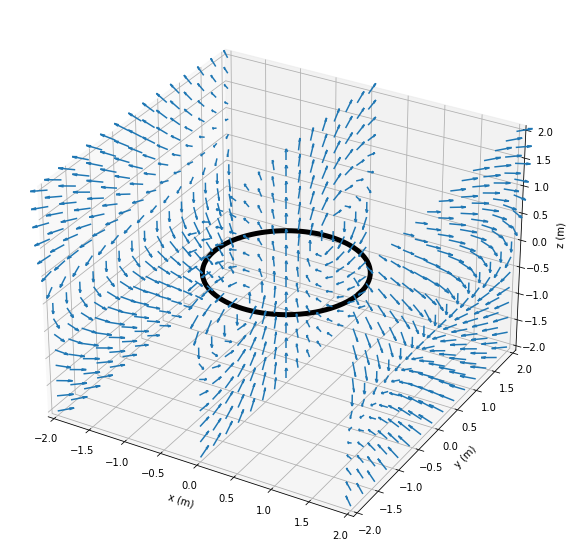

In [9]:
fig = plt.figure(figsize=(10, 10))
# No parâmetro figsize definimos o tamanho da figura
ax = fig.add_subplot(111, projection='3d')
# (É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões)

for xp in xp_list:
    for yp in yp_list:
        for zp in zp_list:
            # Resultado da integração
            resultx = sint.quad(integrandx, 0, 2*np.pi, args=(xp, yp, zp))
            resulty = sint.quad(integrandy, 0, 2*np.pi, args=(xp, yp, zp))
            resultz = sint.quad(integrandz, 0, 2*np.pi, args=(xp, yp, zp))

            # Valores de cada componente do campo
            bx = sconst.mu_0*I/(4*np.pi)*R*zp*resultx[0]
            by = sconst.mu_0*I/(4*np.pi)*R*zp*resulty[0]
            bz = sconst.mu_0*I/(4*np.pi)*R*resultz[0]

            # Normalizando as componentes do campo
            modb = np.sqrt(bx**2 + by**2 + bz**2)
            bxnorm = bx/modb
            bynorm = by/modb
            bznorm = bz/modb

            # Definindo um vetor no gráfico
            ax.quiver(xp, yp, zp, bxnorm, bynorm, bznorm, length=0.2)

# Plotando o fio circular
xl_list = []
yl_list = []
zl_list = []
theta_list = np.linspace(0, 2*np.pi, 100)
for theta in theta_list:
    xl = R*np.cos(theta)
    yl = R*np.sin(theta)
    zl = 0
    xl_list.append(xl)
    yl_list.append(yl)
    zl_list.append(zl)
ax.plot3D(xl_list, yl_list, zl_list, color="black", linewidth = 5)

# Definindo os parâmetros do gráfico
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
plt.show()

Reproduzimos algo bem semelhante com como as linhas de campo de fato deveriam ser! Veja a imagem a seguir:

![Linhas de campo](../Imagens/Campos%20magn%C3%A9ticos%20gerados%20por%20uma%20corrente/espiralinhas.png)

Com estes métodos, conseguimos reproduzir até mesmo os resultados na borda do fio, coisa que não seria tão fácil analiticamente, o que torna tudo bem interessante.

## Conclusão

O interessante de propormos este tipo de problema computacional, é que podemos extender as descrições feitas aqui pra outras geometrias mais complicadas. Fica o questionamento para o leitor: e se quisessemos saber qual o campo magnético gerado por uma bobina de Helmholtz?

Vale ainda lembrar que a referência [1] foi de onde este Notebook foi majoritariamente inspirado. Vale a pena que o leitor confira esta referência pela vasta diversidade de problemas computacionais que a mesma trata.

E ficamos por aqui.

## Referências

**[1]** *Giordano, N. J., & Nakanishi, H. (2006). Computational physics.*